In [1]:
from torch.utils.data import DataLoader
from torchvision import transforms
from matplotlib import pyplot as plt
from modules.dataset.pixelart_dataset import PixelartDataset, onehot2label, CATEGORIES, FilteredDatasetOneHot

import numpy as np

import torch

In [2]:

transform = transforms.Compose([
    transforms.ToTensor(),                # from [0,255] to range [0.0,1.0]
    transforms.Normalize((0.5,), (0.5,))  # range [-1,1]
])

In [17]:

dataset = FilteredDatasetOneHot(PixelartDataset("../dataset", transform=transform), target_classes=[4])
print(dataset.__len__())
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

sprite shape: (89400, 16, 16, 3)
labels shape: (89400, 5)
8000


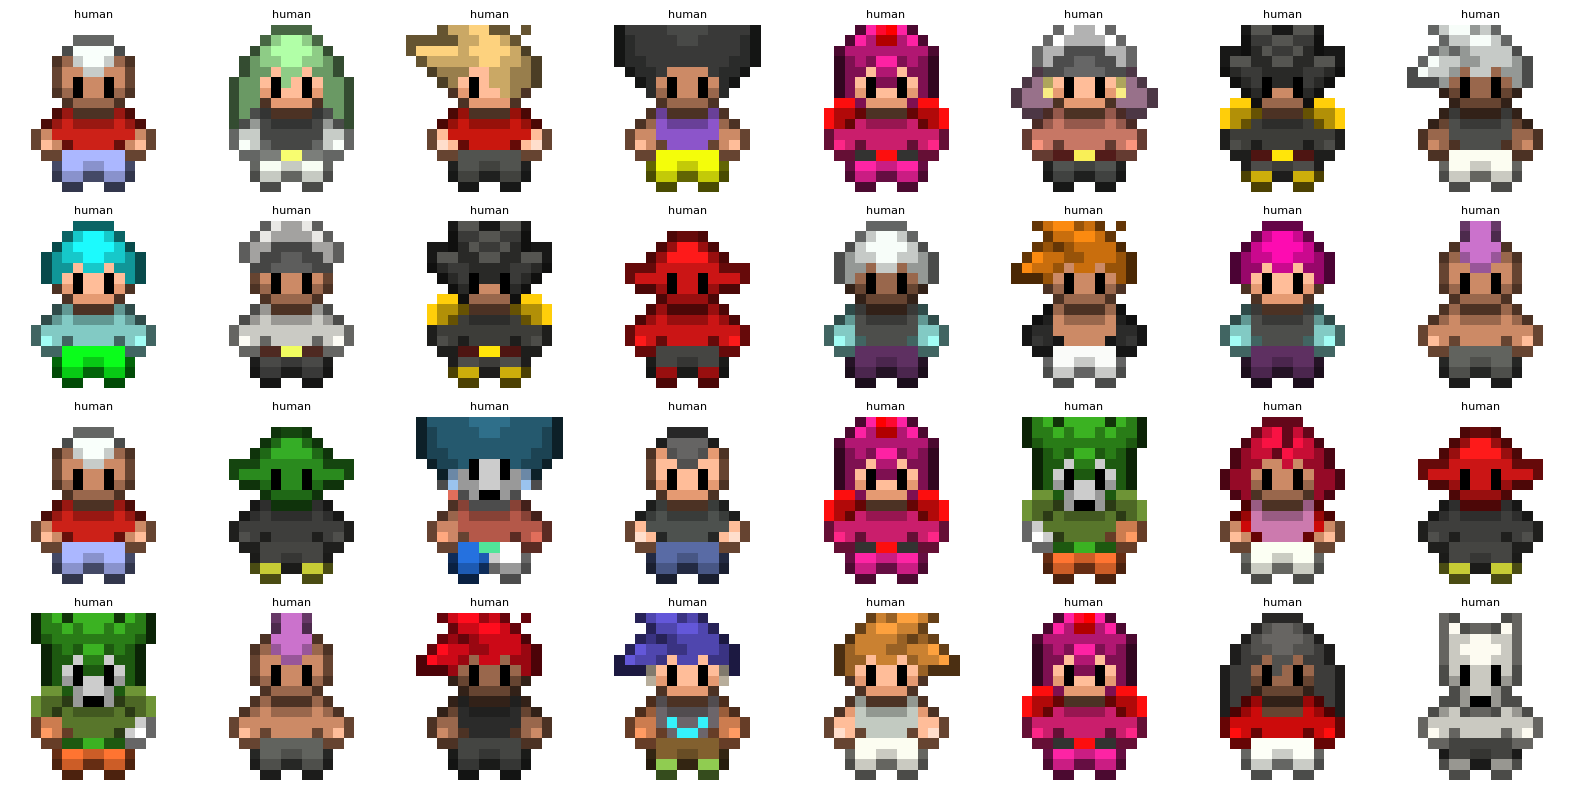

In [12]:

# Obter um batch
dataiter = iter(dataloader)
images, labels = next(dataiter)

# Definir nomes das classes (exemplo: CIFAR-10)
# class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Mostrar imagens individualmente com título
def imshow(img, ax, title):
    img = img / 2 + 0.5  # desfaz normalização [-1,1] -> [0,1]
    npimg = img.numpy()
    ax.imshow(np.transpose(npimg, (1, 2, 0)))
    ax.set_title(title, fontsize=8)
    ax.axis('off')

# Definir layout
batch_size = images.size(0)
cols = 8
rows = (batch_size + cols - 1) // cols

fig, axs = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
axs = axs.flatten()

for i in range(batch_size):
    imshow(images[i], axs[i], onehot2label([labels[i]]))

# Remover eixos vazios se o batch for menor que o número de subplots
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()